# Two-Sample Hypothesis Tests with Python

## Objectives

- Explore the use of parametric and non-parametric statistical methods to compare two samples, both independent and paired.
- Apply two-sample hypothesis testing to determine if there are significant differences between group means or distributions.
- Conduct t-tests, z-tests, Mann-Whitney tests, and Wilcoxon tests using Python libraries such as SciPy and StatsModels.

## Background

This notebook delves into two-sample hypothesis testing using parametric and non-parametric approaches to assess differences between independent and paired sample groups. Through a series of parametric statistical tests, such as t-tests for comparing means, and non-parametric tests, like Mann-Whitney and Wilcoxon, the notebook evaluates the effectiveness of different teaching methods and other comparative studies across various sample data.

## Datasets Used

The notebook employs synthetic data sets to simulate test scores from different classes (Class A, B, C, D) and grades before and after specific interventions or courses. These data sets illustrate the application of two-sample tests under varied conditions, ensuring a broad understanding of when and how to apply each test.

## Introduction

This notebook will use parametric and non-parametric statistical methods to compare two samples: independent and paired.

In [1]:
import numpy as np
from scipy import stats as st
from statsmodels.stats import weightstats as stests

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set_style("whitegrid")  

## Parametric Tests for Two Independent Samples

### Two independent samples t-test

This notebook will use parametric and non-parametric statistical methods to compare two samples: independent and paired.
The Independent Samples t-Test or 2-sample t-test compares the means of two independent groups to determine whether there is statistical evidence that the associated population means are significantly different. 

The Independent Samples t-Test is a parametric test. This test is also known as the Independent t-Test.

**Example 1**: Two different methods taught two sections of a class in statistics. Students’ scores on a standardized test are shown below. Do the results present evidence of a difference in the effectiveness of the two methods?

In [2]:
# Generating the data
np.random.seed(123)
classA = np.random.normal(86,6,23)
classB = np.random.normal(88,5,25)

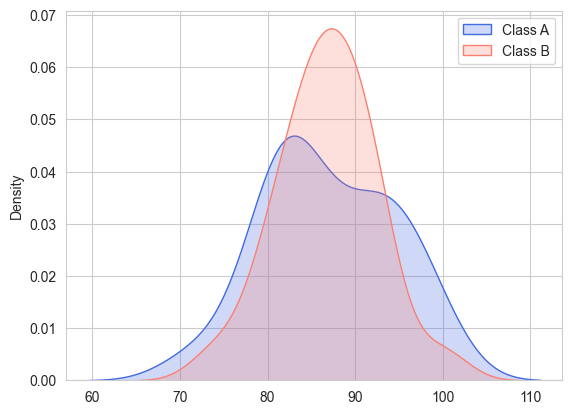

In [3]:
# Plotting densities 
ax=sns.kdeplot(x=classA, color='royalblue', fill=True, label='Class A')
ax=sns.kdeplot(x=classB, color='salmon',    fill=True, label='Class B')
plt.legend();

In [4]:
def two_ind_ttest(sample1, sample2, alpha=0.05, alternative='two-sided'):
    '''
    It compares two independend groups.
    sample1:     sample of values of population 1 (normally distributed)
    sample2:     sample of values of population 2 (normally distributed)
    alpha:       significance level
    alternative: 'two-sided', 'smaller', and 'larger'  
    '''
    sigHa = {'two-sided':'!=', 'smaller':' <', 'larger':' >'}   
    print('--- Two independent sample t-test ---')
    print('    Ho: mean(sample1)  =', 'mean(sample2)')
    print('    Ha: mean(sample1)', sigHa[alternative], 'mean(sample2)')
    print('Sample 1:   n = %i\tMean = %.2f\tStdDev = %.2f' %(len(sample1),np.mean(sample1), np.std(sample1)))
    print('Sample 2:   n = %i\tMean = %.2f,\tStdDev = %.2f' %(len(sample2),np.mean(sample2), np.std(sample2)))
    t_stat, pval, df = stests.ttest_ind(x1=sample1, x2=sample2, usevar='unequal', alternative=alternative)
    print('t-value = %.3f    df = %i    p-value = %.4f' %(t_stat,  df, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reason to reject the null hypothesis." %(pval, alpha))

In [5]:
two_ind_ttest(classA, classB)

--- Two independent sample t-test ---
    Ho: mean(sample1)  = mean(sample2)
    Ha: mean(sample1) != mean(sample2)
Sample 1:   n = 23	Mean = 86.93	StdDev = 7.23
Sample 2:   n = 25	Mean = 86.77,	StdDev = 5.42
t-value = 0.085    df = 40    p-value = 0.9328
0.9328 > 0.05 We have no reason to reject the null hypothesis.


In [6]:
two_ind_ttest(classA, classB, alternative='smaller')

--- Two independent sample t-test ---
    Ho: mean(sample1)  = mean(sample2)
    Ha: mean(sample1)  < mean(sample2)
Sample 1:   n = 23	Mean = 86.93	StdDev = 7.23
Sample 2:   n = 25	Mean = 86.77,	StdDev = 5.42
t-value = 0.085    df = 40    p-value = 0.5336
0.5336 > 0.05 We have no reason to reject the null hypothesis.


### Two independent samples z-test

A `z-test` is a statistical test used to determine whether two population means are different when the variances are known and with large sample size. Usually, 30 cases per group are enough.

In [7]:
from statsmodels.stats import weightstats as stests

We would use a `z-test` if:
- Our sample size is greater than 30. Otherwise, use a t-test.
- Data points should be independent of each other
- Our data should be normally distributed. 
- Our data should be randomly selected from a population where each item has an equal chance of being selected.

In two samples `z-test,` or `t-test`, we are checking two independent data groups and deciding whether the sample means are similar or not.

In [8]:
def two_ind_ztest(sample1, sample2, alpha=0.05, alternative='two-sided'):
    '''
    Compare two independend groups
    sample1:     sample of values of population 1 (normally distributed)
    sample2:     sample of values of population 2 (normally distributed)
    alpha:       significance level
    alternative: 'two-sided', 'smaller', and 'larger'      
    '''
    sigHa = {'two-sided':'!=', 'smaller':' <', 'larger':' >'}       
    print('--- Two independent sample z-test ---')
    print('    Ho: mean(sample1)  =', 'mean(sample2)')
    print('    Ha: mean(sample1)', sigHa[alternative], 'mean(sample2)')
    print('Sample 1:   n = %i\tMean = %.2f\tStdDev = %.2f' %(len(sample1),np.mean(sample1), np.std(sample1)))
    print('Sample 2:   n = %i\tMean = %.2f,\tStdDev = %.2f' %(len(sample2),np.mean(sample2), np.std(sample2)))
    z_stat, pval = stests.ztest(sample1, sample2, value=0, alternative=alternative)
    print('z-value = %.3f    p-value = %.4f' %(z_stat, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reason to reject the null hypothesis." %(pval, alpha))

Let's generate values for classes C and D:

In [9]:
np.random.seed(123)
classC = np.random.normal(80, 3, 100)
classD = np.random.normal(90, 3, 95)

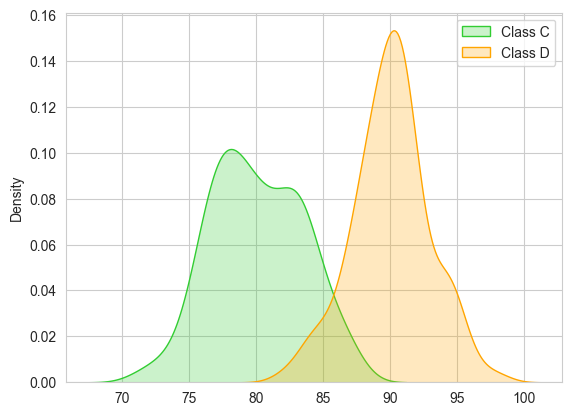

In [10]:
ax=sns.kdeplot(x=classC, color='limegreen', fill=True, label='Class C')
ax=sns.kdeplot(x=classD, color='orange',    fill=True, label='Class D')
plt.legend();

Let's compare class C and D with the z-test:

In [11]:
two_ind_ztest(classC, classD)

--- Two independent sample z-test ---
    Ho: mean(sample1)  = mean(sample2)
    Ha: mean(sample1) != mean(sample2)
Sample 1:   n = 100	Mean = 80.08	StdDev = 3.38
Sample 2:   n = 95	Mean = 90.07,	StdDev = 2.81
z-value = -22.243    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis.


In [12]:
two_ind_ztest(classC, classD, alternative='smaller')

--- Two independent sample z-test ---
    Ho: mean(sample1)  = mean(sample2)
    Ha: mean(sample1)  < mean(sample2)
Sample 1:   n = 100	Mean = 80.08	StdDev = 3.38
Sample 2:   n = 95	Mean = 90.07,	StdDev = 2.81
z-value = -22.243    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis.


In [13]:
two_ind_ztest(classC, classD, alternative='larger')

--- Two independent sample z-test ---
    Ho: mean(sample1)  = mean(sample2)
    Ha: mean(sample1)  > mean(sample2)
Sample 1:   n = 100	Mean = 80.08	StdDev = 3.38
Sample 2:   n = 95	Mean = 90.07,	StdDev = 2.81
z-value = -22.243    p-value = 1.0000
1.0000 > 0.05 We have no reason to reject the null hypothesis.


## Non-paramnetric Tests for Two Independent Samples

### Mann-Whitney U Test

It is a non-parametric test.
Mann-Whitney tests whether the distributions of two independent samples are equal or not.

Assumptions
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.

Interpretation
- Ho: the distributions of both samples are equal.
- Ha: the distributions of both samples are not equal.

In [14]:
def m_w(sample1, sample2, alpha=0.05, alternative='two-sided'):
    '''
    The Mann-Whitney U test is a non-parametric two independent groups.
    sample1:        sample of values of population 1 
    sample2:        sample of values of population 2 
    alpha:          significance level
    alternative:    'two-sided', 'smaller', and 'larger'
    '''
    alt={'two-sided':'two-sided','smaller':'less','larger':'greater'}
    sigHa = {'two-sided':'!=', 'smaller':' <', 'larger':' >'}
    print('--- Non-parametric Mann-Whitney U Test ---')
    print('    Ho: mean_rank(sample1)  =', 'mean_rank(sample2)')
    print('    Ha: mean_rank(sample1)', sigHa[alternative], 'mean_rank(sample2)')
    print('Sample 1:  n = %i\tMean = %.2f\tStdDev = %.2f' %(len(sample1),np.mean(sample1), np.std(sample1)))
    print('Sample 2:  n = %i\tMean = %.2f\tStdDev = %.2f' %(len(sample2),np.mean(sample2), np.std(sample2)))
    stat, pval = st.mannwhitneyu(sample1, sample2, alternative=alt[alternative])
    print('stat = %.2f    p-value = %.4f' %(stat, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reason to reject the null hypothesis." %(pval, alpha))

Remember Mann-Whitney U is a nonparametric test. That means the test does not work with original data. It works with ranks. 

Non-parametric tests are helpful when the usual analysis of variance assumption of normality is not viable.

In [15]:
m_w(classA, classB)

--- Non-parametric Mann-Whitney U Test ---
    Ho: mean_rank(sample1)  = mean_rank(sample2)
    Ha: mean_rank(sample1) != mean_rank(sample2)
Sample 1:  n = 23	Mean = 86.93	StdDev = 7.23
Sample 2:  n = 25	Mean = 86.77	StdDev = 5.42
stat = 284.00    p-value = 0.9506
0.9506 > 0.05 We have no reason to reject the null hypothesis.


In [16]:
m_w(classC, classD)

--- Non-parametric Mann-Whitney U Test ---
    Ho: mean_rank(sample1)  = mean_rank(sample2)
    Ha: mean_rank(sample1) != mean_rank(sample2)
Sample 1:  n = 100	Mean = 80.08	StdDev = 3.38
Sample 2:  n = 95	Mean = 90.07	StdDev = 2.81
stat = 106.00    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis.


In [17]:
m_w(classC, classD, alternative='smaller')

--- Non-parametric Mann-Whitney U Test ---
    Ho: mean_rank(sample1)  = mean_rank(sample2)
    Ha: mean_rank(sample1)  < mean_rank(sample2)
Sample 1:  n = 100	Mean = 80.08	StdDev = 3.38
Sample 2:  n = 95	Mean = 90.07	StdDev = 2.81
stat = 106.00    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis.


### Kolmogorov Smirnov Test

The Kolmogorov-Smirnov test (KS-test) determines if two datasets differ significantly without assuming anything about the data distribution. 

- Ho: the distributions of both samples are equal.
- Ha: the distributions of both samples are not equal.

In [18]:
def k_s(sample1, sample2, alpha=0.05, alternative='two-sided'):
    '''
    The Kolmogorov Smirnov test is a non-parametric two independent groups.
    sample1:        sample of values of population 1 
    sample2:        sample of values of population 2 
    alpha:          significance level
    alternative:    'two-sided', 'smaller', and 'larger'
    '''
    alt={'two-sided':'two-sided','smaller':'less','larger':'greater'}
    sigHa = {'two-sided':'!=', 'smaller':' <', 'larger':' >'}
    print('--- Non-parametric Kolmogorov Smirnov Test ---')
    print('    Ho: mean_rank(sample1)  =', 'mean_rank(sample2)')
    print('    Ha: mean_rank(sample1)', sigHa[alternative], 'mean_rank(sample2)')
    print('Sample 1:  n = %i\tMean = %.2f\tStdDev = %.2f' %(len(sample1),np.mean(sample1), np.std(sample1)))
    print('Sample 2:  n = %i\tMean = %.2f\tStdDev = %.2f' %(len(sample2),np.mean(sample2), np.std(sample2)))
    stat, pval = st.ks_2samp(sample1, sample2, alternative=alt[alternative])
    print('stat = %.2f    p-value = %.4f' %(stat, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reason to reject the null hypothesis." %(pval, alpha))

In [19]:
k_s(classA, classB)

--- Non-parametric Kolmogorov Smirnov Test ---
    Ho: mean_rank(sample1)  = mean_rank(sample2)
    Ha: mean_rank(sample1) != mean_rank(sample2)
Sample 1:  n = 23	Mean = 86.93	StdDev = 7.23
Sample 2:  n = 25	Mean = 86.77	StdDev = 5.42
stat = 0.28    p-value = 0.2438
0.2438 > 0.05 We have no reason to reject the null hypothesis.


In [20]:
k_s(classC, classD)

--- Non-parametric Kolmogorov Smirnov Test ---
    Ho: mean_rank(sample1)  = mean_rank(sample2)
    Ha: mean_rank(sample1) != mean_rank(sample2)
Sample 1:  n = 100	Mean = 80.08	StdDev = 3.38
Sample 2:  n = 95	Mean = 90.07	StdDev = 2.81
stat = 0.90    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis.


In [21]:
k_s(classC, classD, alternative='smaller')

--- Non-parametric Kolmogorov Smirnov Test ---
    Ho: mean_rank(sample1)  = mean_rank(sample2)
    Ha: mean_rank(sample1)  < mean_rank(sample2)
Sample 1:  n = 100	Mean = 80.08	StdDev = 3.38
Sample 2:  n = 95	Mean = 90.07	StdDev = 2.81
stat = 0.00    p-value = 1.0000
1.0000 > 0.05 We have no reason to reject the null hypothesis.


## Parametric Tests for Two Paired Samples

### Paired sample t-test

The paired sample t-test is also called dependent sample t-test. 

It is a univariate test that tests for a significant difference between two related variables. An example of this is if we were to compare students' grades before and after some training or courses.
- Ho: the difference in the means between two samples is 0
- Ha: the difference in the means between two samples is different from 0

Generating fictitious data.

In [22]:
np.random.seed(123)
grade_before = np.random.normal(60,7,20)
grade_after  = np.random.normal(85,5,20)

Presenting some visualizations

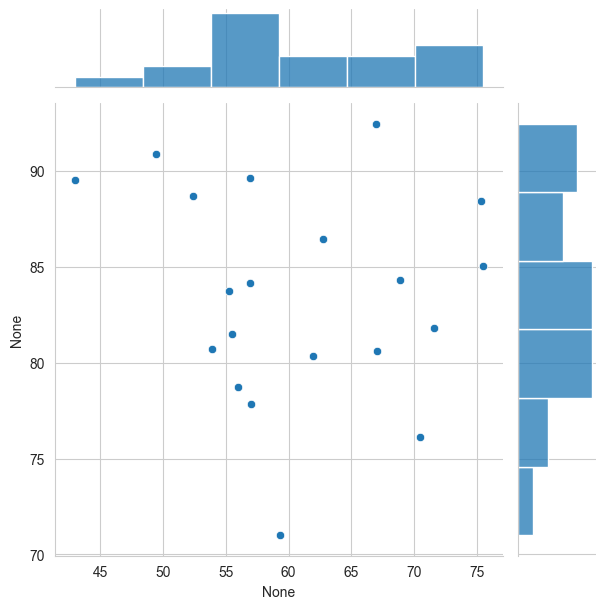

In [23]:
sns.jointplot(x=grade_before, y=grade_after);

Let's create a function to use a t-test for our paired data.

In [24]:
def two_rel_ttest(sample1, sample2, alpha=0.05, alternative='two-sided'):
    '''
    Compare paired groups
    sample1:        sample of values at time 1 (normally distributed)
    sample2:        sample of values at time 2 (normally distributed)
    alpha:          significance level
    alternative:    'two-sided', 'smaller', and 'larger'
    '''
    alt={'two-sided':'two-sided','smaller':'less','larger':'greater'}
    sigH1 = {'two-sided':'!=', 'smaller':' <', 'larger':' >'}
    print('--- Two paired sample t-test ---')
    print('    Ho: mean(sample1)  = mean(sample2)')
    print('    Ha: mean(sample1)', sigH1[alternative], 'mean(sample2)')
    print('Sample 1:  n =%i\tMean = %.2f\tStdDev = %.2f' %(len(sample1),np.mean(sample1), np.std(sample1)))
    print('Sample 2:  n =%i\tMean = %.2f,\tStdDev = %.2f' %(len(sample2),np.mean(sample2), np.std(sample2)))
    t_stat, pval = st.ttest_rel(sample1, sample2, alternative=alt[alternative])    
    print('t-value = %.2f    p-value = %.4f' %(t_stat, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reason to reject the null hypothesis." %(pval, alpha))

In [25]:
two_rel_ttest(grade_before, grade_after)

--- Two paired sample t-test ---
    Ho: mean(sample1)  = mean(sample2)
    Ha: mean(sample1) != mean(sample2)
Sample 1:  n =20	Mean = 60.80	StdDev = 8.58
Sample 2:  n =20	Mean = 83.59,	StdDev = 5.34
t-value = -9.30    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis.


In [26]:
two_rel_ttest(grade_before, grade_after, alternative='smaller')

--- Two paired sample t-test ---
    Ho: mean(sample1)  = mean(sample2)
    Ha: mean(sample1)  < mean(sample2)
Sample 1:  n =20	Mean = 60.80	StdDev = 8.58
Sample 2:  n =20	Mean = 83.59,	StdDev = 5.34
t-value = -9.30    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis.


As we can see, we are rejecting the null hypothesis. There are differences between the grades before and after.

Let us generate grade_after2, with values similar to grade_before.

In [27]:
grade_after2 = np.random.normal(64,5,20)

In [28]:
two_rel_ttest(grade_before, grade_after2)

--- Two paired sample t-test ---
    Ho: mean(sample1)  = mean(sample2)
    Ha: mean(sample1) != mean(sample2)
Sample 1:  n =20	Mean = 60.80	StdDev = 8.58
Sample 2:  n =20	Mean = 66.23,	StdDev = 5.80
t-value = -2.35    p-value = 0.0300
0.0300 <= 0.05 We are rejecting null hypothesis.


p-value > alpha, therefore there are not significant differences.

## Non-parametric Test for Two Paired Data

### Wilcoxon Signed-Rank Test

It is a non-parametric test.

It tests whether the distributions of two paired samples are equal or not.

Assumptions
- Observations in each sample are independent and identically distributed (iid).
- Observations in each sample can be ranked.
- Observations across each sample are paired.

Interpretation
- Ho: the distributions of both samples are equal.
- Ha: the distributions of both samples are not equal.

In [29]:
def wilcoxon(sample1, sample2, alpha=0.05, alternative='two-sided'):
    '''
    The Wilcoxon test is a nonparametric statistical test that compares two paired groups.
    sample1:        sample of values at time 1 
    sample2:        sample of values at time 2 
    alpha:          significance level
    alternative:    'two-sided', 'smaller', and 'larger'
    '''
    alt={'two-sided':'two-sided','smaller':'less','larger':'greater'}
    sigH1 = {'two-sided':'!=', 'smaller':' <', 'larger':' >'}
    print('--- Non-parametric Wilcoxon Signed-Rank Test ---')
    print('    Ho: mean_rank(sample1)  = mean_rank(sample2)')
    print('    Ha: mean_rank(sample1)', sigH1[alternative], 'mean_rank(sample2)')
    print('Sample 1:\tn =%i\tMean = %.2f\tStdDev = %.2f' %(len(sample1),np.mean(sample1), np.std(sample1)))
    print('Sample 2:\tn =%i\tMean = %.2f,\tStdDev = %.2f' %(len(sample2),np.mean(sample2), np.std(sample2)))
    stat, pval = st.wilcoxon(sample1, sample2, alternative=alt[alternative])    
    print('stat = %.3f    p-value = %.4f' %(stat, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reason to reject the null hypothesis." %(pval, alpha))

In [30]:
wilcoxon(grade_before, grade_after)

--- Non-parametric Wilcoxon Signed-Rank Test ---
    Ho: mean_rank(sample1)  = mean_rank(sample2)
    Ha: mean_rank(sample1) != mean_rank(sample2)
Sample 1:	n =20	Mean = 60.80	StdDev = 8.58
Sample 2:	n =20	Mean = 83.59,	StdDev = 5.34
stat = 0.000    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis.


In [31]:
wilcoxon(grade_before, grade_after, alternative='smaller')

--- Non-parametric Wilcoxon Signed-Rank Test ---
    Ho: mean_rank(sample1)  = mean_rank(sample2)
    Ha: mean_rank(sample1)  < mean_rank(sample2)
Sample 1:	n =20	Mean = 60.80	StdDev = 8.58
Sample 2:	n =20	Mean = 83.59,	StdDev = 5.34
stat = 0.000    p-value = 0.0000
0.0000 <= 0.05 We are rejecting null hypothesis.


In [32]:
wilcoxon(grade_before, grade_after2)

--- Non-parametric Wilcoxon Signed-Rank Test ---
    Ho: mean_rank(sample1)  = mean_rank(sample2)
    Ha: mean_rank(sample1) != mean_rank(sample2)
Sample 1:	n =20	Mean = 60.80	StdDev = 8.58
Sample 2:	n =20	Mean = 66.23,	StdDev = 5.80
stat = 48.000    p-value = 0.0328
0.0328 <= 0.05 We are rejecting null hypothesis.


## Conclusions

Key Takeaways:
- Parametric tests such as the independent samples t-test and z-test were effectively used to compare group means, showing no significant differences in certain cases, such as the performance of students in Class A versus Class B. This illustrates how parametric tests can be used when adequate sample sizes and data assumptions are met.
- Non-parametric tests, including the Mann-Whitney U and Wilcoxon Signed-Rank tests, provided a valuable alternative for analyzing data distributions without assuming normality. 
- The Wilcoxon test highlighted significant changes in paired samples, reflecting the impact of educational interventions on student grades. Thus, it stressed its utility when data points are paired and non-normally distributed.
- This analysis underscores the importance of selecting the appropriate hypothesis test based on data characteristics and research objectives, ensuring accurate and meaningful statistical inference.

## References

- Dekking, F.M. et.al. (2005) A Modern Introduction to Probability and Statistics, USA: Springer
- Good, P. (2005) Permutation, Parametric, and Bootstrap Tests of Hypothesis, Third Edition, USA: Springer Series in Statistics